In [1]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt 


Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_data = "C:/Users/hp/datasets/Train"
valid_data = "C:/Users/hp/datasets/Validate"


In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
  

In [4]:
for layer in vgg.layers:
  layer.trainable = False


In [5]:
folders = glob('C:/Users/hp/datasets/Train/*')
folders


['C:/Users/hp/datasets/Train\\Pooja_train',
 'C:/Users/hp/datasets/Train\\Prajakta_train',
 'C:/Users/hp/datasets/Train\\Vidya_train']

In [6]:
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [12]:

training_set = train_datagen.flow_from_directory("C:/Users/hp/datasets/Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("C:/Users/hp/datasets/Validate",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 235 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
8/8 [==============================] - 357s 45s/step - loss: 0.9166 - accuracy: 0.6851 - val_loss: 0.0769 - val_accuracy: 1.0000
Epoch 2/5
8/8 [==============================] - 228s 29s/step - loss: 0.1334 - accuracy: 0.9787 - val_loss: 0.0409 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 228s 29s/step - loss: 0.0362 - accuracy: 0.9957 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 234s 29s/step - loss: 0.0127 - accuracy: 0.9915 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 230s 29s/step - loss: 0.0091 - accuracy: 0.9957 - val_loss: 0.0064 - val_accuracy: 1.0000


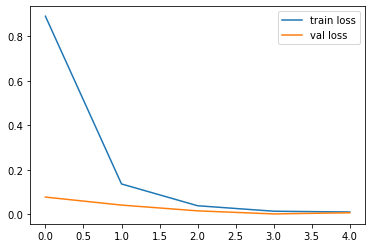

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


In [15]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')
